In [7]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt 

In [149]:
data_c = pd.read_csv("data/final/1min/BTC.csv")
data_c.drop("system_time", axis = 1)
data_c['Next_mid'] = data_c.midpoint.shift(-1)
data_c['Price_move'] = (data_c.Next_mid - data_c.midpoint) / data_c.midpoint
data_c.dropna(axis=0, inplace=True) #drop the last row which is now Nan

data_c['y'] = 0
data_c.loc[(data_c['Price_move'] < -0.0005), 'y'] = 1
data_c.loc[(data_c['Price_move'] > 0.0005), 'y'] = 2
data_c.drop(['Next_mid', 'midpoint', 'Price_move', "system_time", "Return"], axis=1, inplace=True)

data_c.head()

,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,bids_distance_5,bids_distance_6,...,PreAvg,JV,PJ,SV,ASV,RQ,RQTri,RQQuad,NV,y
0,0.01,8.243388e+05,854362.503980,-8.890902e-08,-0.000002,-0.000042,-0.000169,-0.000191,-0.000252,-0.000443,...,0.001336,0.0,0.0,7.677271e-08,0.000003,0.000016,4.678313e-07,2.214260e-08,5398.546583,0
1,0.01,4.043096e+05,174798.367015,-8.893365e-08,-0.000030,-0.000050,-0.000206,-0.000216,-0.000250,-0.000256,...,0.001315,0.0,0.0,3.075970e-07,0.000003,0.000016,4.678492e-07,2.212838e-08,5318.152883,2
2,0.01,7.976876e+05,245080.699183,-8.888435e-08,-0.000043,-0.000044,-0.000065,-0.000066,-0.000085,-0.000160,...,0.001217,0.0,0.0,4.481803e-06,0.000003,0.000016,4.508335e-07,2.206376e-08,5320.068883,2
3,6.30,8.938642e+05,504274.642389,-5.587871e-05,-0.000091,-0.000128,-0.000252,-0.000259,-0.000265,-0.000267,...,0.001235,0.0,0.0,1.234156e-06,0.000003,0.000016,4.508341e-07,2.210425e-08,4994.242080,2
4,2.28,1.904225e+06,765199.134667,-2.020032e-05,-0.000107,-0.000107,-0.000158,-0.000189,-0.000189,-0.000235,...,0.001181,0.0,0.0,1.186346e-06,0.000003,0.000016,4.508435e-07,2.215744e-08,5112.644874,1


In [154]:
data_c.iloc[240:243,:]

,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,bids_distance_5,bids_distance_6,...,PreAvg,JV,PJ,SV,ASV,RQ,RQTri,RQQuad,NV,y
240,0.01,194648.658288,87041.803083,-8.847609e-08,-0.000043,-0.000098,-0.000102,-0.000160,-0.000160,-0.000189,...,0.000420,0.0,0.0,1.439337e-06,0.000001,7.744539e-07,2.172278e-08,7.834968e-09,1950.910332,2
241,0.01,270732.093621,363003.808715,-8.837000e-08,-0.000066,-0.000066,-0.000066,-0.000066,-0.000066,-0.000084,...,0.000421,0.0,0.0,1.730223e-07,0.000001,7.503164e-07,2.081325e-08,8.212244e-09,2023.330437,0
242,0.01,355102.850000,147063.422387,-8.833325e-08,-0.000015,-0.000068,-0.000276,-0.000336,-0.000336,-0.000361,...,0.000421,0.0,0.0,5.766543e-07,0.000001,7.503056e-07,2.158346e-08,8.274446e-09,1982.820997,2


In [164]:
data[0,240:242,1]

array([-0.35013619, -0.3492982 ])

In [158]:
data.shape

(1, 16808, 34)

In [201]:
data = pd.read_csv("data/final/1min/BidAsk/BTC_std.csv").values

In [168]:
Y_train_lstm

array([[[2],
        [0],
        [2],
        ...,
        [1],
        [1],
        [1]]])

In [202]:
r,x = data.shape

In [170]:
r

16808

In [117]:
from keras.models import Sequential

In [118]:
from keras.layers.recurrent import LSTM
from keras.layers import Dense

In [271]:
model = Sequential()
model.add(LSTM(32, input_shape=(None, x), return_sequences = True))
#model.add(LSTM(8, return_sequences = True))
#model.add(LSTM(4, return_sequences = True))
#model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

In [275]:
#opt = keras.optimizers.Adam(learning_rate=1e-06)

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [213]:
data = data.reshape((1, r, x))

In [199]:
pd.DataFrame(data[0,:,:])

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,-0.314976,-0.956187,-0.794095,0.315132,0.042656,-0.240160,0.219632,-0.218039,0.052889,...,0.181365,0.165688,-0.020475,0.148886,-0.046401,-0.207341,-0.171601,-0.319917,-0.463073,-0.519005
1,1.0,-0.313477,-0.699309,0.075948,-0.064149,-0.071685,0.065532,-0.060674,0.069833,-0.035636,...,-0.055824,-0.056365,0.149259,-0.048391,0.109151,0.073414,0.073723,0.071401,0.070304,0.070183
2,2.0,-0.311992,-0.417283,-0.596680,-0.049868,0.028043,0.045983,-0.055556,0.028337,-0.059413,...,-0.033186,-0.029933,-0.044991,-0.033474,-0.025897,0.045337,0.039590,0.051953,0.056235,0.056754
3,3.0,-0.310520,-0.411893,-0.927753,-0.039337,0.000210,0.030334,-0.030278,0.028530,0.015353,...,-0.034084,-0.029863,-0.036776,-0.030643,-0.026138,0.020755,0.012863,0.033678,0.042722,0.044629
4,4.0,2.372926,-0.420244,-0.129456,-0.033466,-0.010502,0.023046,-0.019258,0.026627,0.027127,...,-0.019045,-0.018797,-0.019813,-0.017198,-0.011661,0.015466,0.009895,0.027578,0.036627,0.038894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16803,16803.0,-0.234392,1.191716,1.859431,0.001226,0.001130,-0.003747,-0.002824,-0.003443,-0.006208,...,0.000042,0.003113,0.001377,0.002654,0.003937,0.009551,0.008093,0.006677,0.005893,0.008583
16804,16804.0,-0.234378,1.654534,0.839026,0.001214,0.003382,-0.007434,-0.006314,-0.004674,-0.004433,...,0.003697,0.004212,0.003778,0.003474,0.003143,0.004521,0.005485,0.004116,0.005588,0.005243
16805,16805.0,2.723757,0.958572,2.713586,-0.007800,-0.000358,0.001995,0.001876,0.002980,0.004241,...,-0.004161,-0.004701,-0.005988,-0.004201,-0.005354,-0.006599,-0.003196,-0.003843,-0.003939,-0.003135
16806,16806.0,0.925270,1.278939,0.473249,-0.002250,0.003275,-0.000266,0.001959,0.003141,0.003612,...,-0.004394,-0.001515,-0.001562,-0.002746,-0.003779,-0.004319,-0.005232,-0.005832,-0.006957,-0.007334


In [200]:
data

array([[[ 0.00000000e+00, -3.14975695e-01, -9.56186908e-01, ...,
         -3.19916959e-01, -4.63072945e-01, -5.19004631e-01],
        [ 1.00000000e+00, -3.13477309e-01, -6.99309456e-01, ...,
          7.14008535e-02,  7.03036058e-02,  7.01830747e-02],
        [ 2.00000000e+00, -3.11992248e-01, -4.17282876e-01, ...,
          5.19529228e-02,  5.62353149e-02,  5.67544399e-02],
        ...,
        [ 1.68050000e+04,  2.72375710e+00,  9.58571674e-01, ...,
         -3.84254887e-03, -3.93916540e-03, -3.13508972e-03],
        [ 1.68060000e+04,  9.25270443e-01,  1.27893864e+00, ...,
         -5.83238676e-03, -6.95739439e-03, -7.33438254e-03],
        [ 1.68070000e+04, -2.34439090e-01,  4.84977311e+00, ...,
         -8.71716433e-03, -9.73873496e-03, -1.05195856e-02]]])

In [205]:
Y = pd.read_csv("data/final/1min/BidAsk/BTC_Y_std.csv")

In [206]:
Y = Y["y"].values

In [207]:
Y

array([2, 0, 2, ..., 2, 1, 1])

In [211]:
Y_std = Y.reshape((1,r,1))

In [209]:
Y_std.mean()

0.6962755830556878

In [214]:
train_lstm = data[:,:14000,:]
val_lstm = data[:,14000:15500,:]
test_lstm = data[:,15500:,:]

In [215]:
Y_train_lstm = Y_std[:,:14000,:]
Y_val_lstm = Y_std[:,14000:15500,:]
Y_test_lstm = Y_std[:,15500:,:]

In [277]:
history = model.fit(train_lstm, Y_train_lstm, epochs=100, validation_data = (val_lstm, Y_val_lstm))

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 1.1440 - accuracy: 0.2319 - val_loss: 1.1089 - val_accuracy: 0.3387
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 1.1391 - accuracy: 0.2430 - val_loss: 1.1073 - val_accuracy: 0.3400
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 1.1345 - accuracy: 0.2542 - val_loss: 1.1059 - val_accuracy: 0.3373
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 1.1303 - accuracy: 0.2668 - val_loss: 1.1046 - val_accuracy: 0.3393
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 1.1264 - accuracy: 0.2762 - val_loss: 1.1035 - val_accuracy: 0.3367
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 1.1228 - accuracy: 0.2883 - val_loss: 1.1025 - val_accuracy: 0.3380
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 1.1194 - accuracy: 0.3009 - val_loss: 1.1016 - val_accuracy: 0.3380
Epoch 8/100
1/1 [=================

Epoch 60/100
1/1 [==============================] - 6s 6s/step - loss: 1.0520 - accuracy: 0.5711 - val_loss: 1.0981 - val_accuracy: 0.3513
Epoch 61/100
1/1 [==============================] - 6s 6s/step - loss: 1.0514 - accuracy: 0.5714 - val_loss: 1.0983 - val_accuracy: 0.3520
Epoch 62/100
1/1 [==============================] - 6s 6s/step - loss: 1.0508 - accuracy: 0.5716 - val_loss: 1.0984 - val_accuracy: 0.3513
Epoch 63/100
1/1 [==============================] - 6s 6s/step - loss: 1.0501 - accuracy: 0.5718 - val_loss: 1.0985 - val_accuracy: 0.3513
Epoch 64/100
1/1 [==============================] - 6s 6s/step - loss: 1.0495 - accuracy: 0.5720 - val_loss: 1.0987 - val_accuracy: 0.3520
Epoch 65/100
1/1 [==============================] - 6s 6s/step - loss: 1.0489 - accuracy: 0.5721 - val_loss: 1.0988 - val_accuracy: 0.3520
Epoch 66/100
1/1 [==============================] - 6s 6s/step - loss: 1.0483 - accuracy: 0.5723 - val_loss: 1.0989 - val_accuracy: 0.3513
Epoch 67/100
1/1 [=========

In [218]:
Y_train_lstm

array([[[2],
        [0],
        [2],
        ...,
        [1],
        [1],
        [1]]])

In [219]:
train_lstm

array([[[-3.14975695e-01, -9.56186908e-01, -7.94094556e-01, ...,
         -3.19916959e-01, -4.63072945e-01, -5.19004631e-01],
        [-3.13477309e-01, -6.99309456e-01,  7.59479658e-02, ...,
          7.14008535e-02,  7.03036058e-02,  7.01830747e-02],
        [-3.11992248e-01, -4.17282876e-01, -5.96679730e-01, ...,
          5.19529228e-02,  5.62353149e-02,  5.67544399e-02],
        ...,
        [-2.37130268e-01,  3.26676733e+00,  9.11416135e-01, ...,
         -2.52360521e-03, -2.27119305e-03, -2.50689309e-03],
        [-2.37110524e-01,  5.12625557e-01,  2.51837035e+00, ...,
          2.57621378e-03,  9.36396408e-04,  2.23203845e-04],
        [-2.37090782e-01,  3.57938477e-01,  5.68604437e-01, ...,
         -7.65977713e-03, -8.33235450e-03, -9.09042449e-03]]])

In [220]:
train_lstm

array([[[-3.14975695e-01, -9.56186908e-01, -7.94094556e-01, ...,
         -3.19916959e-01, -4.63072945e-01, -5.19004631e-01],
        [-3.13477309e-01, -6.99309456e-01,  7.59479658e-02, ...,
          7.14008535e-02,  7.03036058e-02,  7.01830747e-02],
        [-3.11992248e-01, -4.17282876e-01, -5.96679730e-01, ...,
          5.19529228e-02,  5.62353149e-02,  5.67544399e-02],
        ...,
        [-2.37130268e-01,  3.26676733e+00,  9.11416135e-01, ...,
         -2.52360521e-03, -2.27119305e-03, -2.50689309e-03],
        [-2.37110524e-01,  5.12625557e-01,  2.51837035e+00, ...,
          2.57621378e-03,  9.36396408e-04,  2.23203845e-04],
        [-2.37090782e-01,  3.57938477e-01,  5.68604437e-01, ...,
         -7.65977713e-03, -8.33235450e-03, -9.09042449e-03]]])

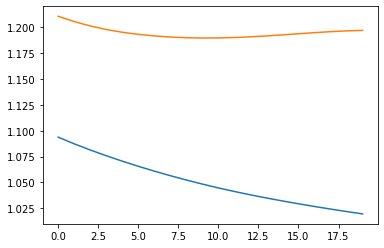

In [241]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [279]:
model.predict_classes(test_lstm)

array([[0, 0, 0, ..., 0, 0, 0]])

In [278]:
np.argmax(model.predict(test_lstm), axis=-1)

array([[0, 0, 0, ..., 0, 0, 0]])

In [246]:
model.predict(test_lstm)

array([[[0.48098266, 0.17939577, 0.33962154],
        [0.52133286, 0.1443433 , 0.3343238 ],
        [0.51235235, 0.16149235, 0.32615528],
        ...,
        [0.47349715, 0.21354643, 0.31295645],
        [0.47818467, 0.20842217, 0.31339324],
        [0.51321006, 0.18346418, 0.30332574]]], dtype=float32)

In [ ]:
model.predict_classes(test_lstm)

In [247]:
Y_test_lstm[:,1:10,:]

array([[[2],
        [2],
        [1],
        [1],
        [1],
        [2],
        [2],
        [1],
        [1]]])

In [280]:
pred = np.argmax(model.predict(test_lstm), axis=-1)

In [281]:
pred

array([[0, 0, 0, ..., 0, 0, 0]])

In [258]:
pred[0,:]

array([0, 0, 0, ..., 0, 0, 0])

In [282]:
np.bincount(pred[0,:])

array([1308])

In [263]:
pred.shape

(1, 1308)

In [262]:
np.nonzero(pred[0,:])

(array([], dtype=int64),)